<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/5_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the Keras API

Keras is a high-level neural networks API, written in Python, and capable of running on top of TensorFlow. It allows for easy and fast prototyping of deep learning models.

Ther main Keras API to buld DLNN is the **Sequential API**, where layers are stacked on top of each other. The **Layers** are the building blocks of neural networks in Keras. The **Dense layer** (tf.keras.layers.Dense), also known as a fully connected layer, is the most common layer used in neural networks. It connects each input neuron to every output neuron.


The*Input* layer in Keras serves as the entry point for the data into a neural network model. It defines the shape and type of the input data that the model will receive. The purpose of the Input layer is to specify the input shape without requiring an actual batch of data. Although it is not mandatory to specify this layer, if it is not specified there is functionality, such as showing a summary of the model, that cannot be done with the model until it has been compiled. The shape parameter receives a  tuple of integers or None objects.

The following code creates a neural network with 3 dense layers with 64 neurons in each layer, and an output layer (the last layer) with three neurons (it could be used for example to predict the class in the iris dataset). It expects 4 features as input (shape=(4,).

```python
model = models.Sequential([
    layers.IOnput(shape=(4,)),
    layers.Dense(64),
    layers.Dense(64),
    layers.Dense(64),
    layers.Dense(3)
])
```

### Activation functions

The **Activation functions** define the output of a layer. Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Keras offers a variety of activation functions to choose from. Here are some of the most commonly used:

* ReLU (Rectified Linear Unit): This is the default activation function in many Keras layers. It returns the input directly if it's positive, otherwise it returns 0. It's computationally efficient and has helped to improve the performance of deep neural networks. It can also be a good choice for the output layer neuron in a regression problem.f(x) = max(0, x)
* Sigmoid: The sigmoid function outputs a value between 0 and 1, making it suitable for binary classification problems. However, it suffers from the vanishing gradient problem, which can slow down training. f(x) = 1 / (1 + exp(-x))
* Tanh (Hyperbolic Tangent): Similar to sigmoid, but the output ranges from -1 to 1. It's often used in recurrent neural networks (RNNs). f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
* Softmax: Used in the output layer of multi-class classification problems. It converts a vector of numbers into a probability distribution.
Leaky ReLU: A variation of ReLU that allows a small gradient when the input is negative, helping to alleviate the dying ReLU problem. f(x) = max(αx, x) where α is a small constant.
* ELU (Exponential Linear Unit): Similar to Leaky ReLU, but the negative part is exponential. It has been shown to outperform ReLU and Leaky ReLU in some cases.
* Softmax: The softmax function converts a vector of real numbers into a probability distribution where the sum of all probabilities equals 1. Each element of the vector represents the probability of the input belonging to a specific class, which is useful when classes are mutually exclusive. It is often a good choice for a multi-class classification problem (such as the iris dataset) with  the categorical_crossentropy or sparse_categorical_crossentropy loss functions. For a binary classification problem we could use the Sigmoid or Tanh functions with the binary_crossentropy los function.

When creating a Layer we can indicate which activation function we want. If not, ReLU will be used by default.


```python
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
```

### Compiling the Model

Before training, you need to compile the model. This step includes specifying:

* Loss function: The function that the model will try to minimize. Common loss functions are mean_squared_error for regression and categorical_crossentropy,  sparse_categorical_crossentropy or binary_crossentropy for classification.
* Optimizer: The algorithm that adjusts the model’s weights. Popular choices are adam, sgd, and rmsprop.
* Metrics: Performance measures to compute such as accuracy or mean squared error.

The categorical_crossentropy loss function expects the target labels to be one-hot encoded. One-hot encoding transforms categorical labels into a binary matrix representation where each label is represented by a vector with a 1 in the position corresponding to the class index and 0s elsewhere.

If you have 3 classes (e.g., A, B, C), the labels might look like this:

* Class A: [1, 0, 0]
* Class B: [0, 1, 0]
* Class C: [0, 0, 1]

You need to use categorical_crossentropy when your labels are already in one-hot encoded format.

On the other hand, the parse_categorical_crossentropy loss function expects the target labels to be integer-encoded. In this format, each label is represented by an integer corresponding to the class index.

Using the same 3 classes (A, B, C), the labels would be:

* Class A: 0
* Class B: 1
* Class C: 2

You need to use sparse_categorical_crossentropy when your labels are in integer format, and you don't want to convert them to one-hot encoded vectors.

```python

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### Training the Model
To train the model, use the **fit method**, where you specify the input data, labels, and training parameters like epochs and batch size.

```python
model.fit(x_iris, y_iris, epochs=5, batch_size=64)
```

### Evaluating and Predicting
After training, you can evaluate the model on test data using **evaluate**, and make predictions on new data using **predict**.

```python
test_loss, test_acc = model.evaluate((X_iris_test, (y_iris_test)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(X_iris_test)
print(predictions[0])
```

## My first Keras Neural Network

We import the libraries that we are going to need:

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'
iris = pd.read_csv(url)

The class of the iris dataset is text ("object"):

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We need to encode it properly for Keras using **LabelEcoder**. Each class will be represented by an integer:

In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

iris.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Using the sequential API we will build a network with 3 layers with 50 neurons in each layer and using the Relu activation function. Since there are 3 possible classes in the iris dataset, the output layer will have 3 neurons. In order for the probability of belonging to each of the classes for each instance at add up to 1, we will use the sofmax activation function in this output layer.

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf

# Split data into features (X) and labels (y)
X = iris.drop('class', axis=1)
y = iris['class']

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, input_dim=4, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Since we have represented the class as an integer that corresponds to a different index of the class values, the loss function that we must use is sparse_categorical_crossentropy. The optimizer that we will use is adam with default parameters. when compiling the model, we will indicate these parameters.

In [25]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2423 - loss: 1.1287
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.9653 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.8924 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.8173 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.7463 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7453 - loss: 0.6760 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.6148 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.5631 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.5186 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.4807 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.4492 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss

in the fit method you may specify a **validation_split** proportion. In this case, this proportion of samples will be used to measure the performance of the model at the end of each epoch.

In [54]:
# Create a sequential model ; if we call the fit method again on the previous model,
# the training will continue where we left off
model = Sequential([
  Input(shape =(4,)),
  Dense(50, input_dim=4, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3601 - loss: 1.2114 - val_accuracy: 0.6667 - val_loss: 1.0128
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6756 - loss: 0.9435 - val_accuracy: 0.6667 - val_loss: 0.8480
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6756 - loss: 0.7917 - val_accuracy: 0.6667 - val_loss: 0.7291
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7606 - loss: 0.6791 - val_accuracy: 1.0000 - val_loss: 0.6220
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8626 - loss: 0.5887 - val_accuracy: 1.0000 - val_loss: 0.5462
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8522 - loss: 0.5220 - val_accuracy: 1.0000 - val_loss: 0.4883
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8684 - loss: 0.4710 - val_accuracy: 1.0000 - val_loss: 0.4505
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9105 - loss: 0.4330 - val_accuracy: 1.0000 - val_loss: 0.41

Using the **summary** method we can see a summary of the model structure, including how many parameters are in each layer:

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,503 (21.50 KB)

 Trainable params: 5,503 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

Once the model is trained, we can use it to make predictions. The data set of three is then predicted, and the result for the prediction for the first instance in that set is shown. We can see the probability of belonging to each of the three classes:

In [26]:
predictions = model.predict(X_test)
print(predictions[0])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1.6041451e-04 9.9396783e-01 5.8717607e-03]


### Keras errors

Let's see what happens if we had made a mistake when compiling the model and had specified categorical_crossentropy as the loss to use instead of sparse_categorical_crossentropy u(ncomment the following code):

In [7]:
# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochsA dormir
 and batch size of 16
#model.fit(X_train, y_train, epochs=100, batch_size=16)

It is important to familiarize yourself with these types of errors, as they will often arise when you start building models. The error is indicating that there is a mismatch between the expected shape of the output. If we had used one hot encoding we could have specified categorical_crossentropy as the loss function. Let's see what an example of this would look like.

In [8]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(iris[['class']]).toarray())
iris_onehot = iris.join(enc_df)

# Let us use more friendly names for new columns
iris_onehot = iris_onehot.rename(columns={0: 'class_Setosa'})
iris_onehot = iris_onehot.rename(columns={1: 'class__Versicolor'})
iris_onehot = iris_onehot.rename(columns={2: 'class_Virginica'})

# Delete the original class column
iris_onehot = iris_onehot.drop('class', axis=1)
iris_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal.length       150 non-null    float64
 1   sepal.width        150 non-null    float64
 2   petal.length       150 non-null    float64
 3   petal.width        150 non-null    float64
 4   class_Setosa       150 non-null    float64
 5   class__Versicolor  150 non-null    float64
 6   class_Virginica    150 non-null    float64
dtypes: float64(7)
memory usage: 8.3 KB


Now let's compile and train the same model that we had created before to use categorical_crossentropy:



In [9]:
# Split data into features (X) and labels (y)
X_onehot = iris_onehot.drop(['class_Setosa', 'class__Versicolor', 'class_Virginica'], axis=1)
y_onehot = iris_onehot[['class_Setosa', 'class__Versicolor', 'class_Virginica']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y_onehot, test_size=0.4, random_state=42)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
model.fit(X_train, y_train, epochs=100, batch_size=16)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9732 - loss: 0.0715
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.1390 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0708 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0524 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - loss: 0.0762 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0586 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0543 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0623 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0585 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0560 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0589 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss

Again, look at the error we would get if we had used the loss function that expects the class to be encoded with a single column (uncomment the following code):

In [10]:
# Compile the model
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with 100 epochs and batch size of 16
#model.fit(X_train, y_train, epochs=100, batch_size=16)

## Validation of Keras models

By special method **fit** returns a **history** object containing various training information, with a list of epochs, and metrics obtained at the end of each epoch. We can use this object to display a graph with the losses and accuracies during training and validation:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.3877 - loss: 1.2468 - val_accuracy: 0.0000e+00 - val_loss: 1.0230
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7800 - loss: 0.8608 - val_accuracy: 0.0000e+00 - val_loss: 1.4069
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8197 - loss: 0.7138 - val_accuracy: 0.0000e+00 - val_loss: 1.4612
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8197 - loss: 0.6048 - val_accuracy: 0.0000e+00 - val_loss: 1.3198
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8197 - loss: 0.5161 - val_accuracy: 0.0000e+00 - val_loss: 1.1440
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8197 - loss: 0.4453 - val_accuracy: 0.0000e+00 - val_loss: 1.0616
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8197 - loss: 0.3887 - val_accuracy: 0.0000e+00 - val_loss: 1.0072
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8197 - loss: 0.3470 - val_ac

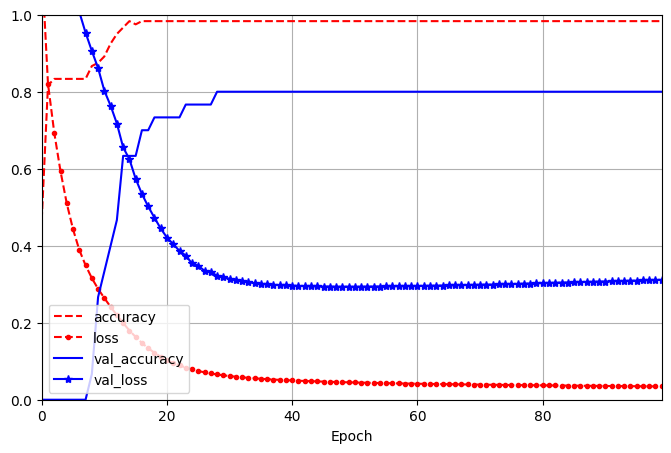

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sequential model
model = Sequential([
  Input(shape =(4,)),
  Dense(50, input_dim=4, activation='relu'),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Get training history
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2)

#plot losses and accuracies
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [56]:
# prompt: Entrena una arrendaron al con 3 capas con 50 neuronas en cada capa Sobre el conjunto de datos iris empleando validación cruzada de despliegues. Reporta al final el valor promedio la desviación estándar del modelo

from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 10

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store the accuracy for each fold
acc_per_fold = []

# Iterate over the folds
fold_no = 1
for train_index, test_index in kf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Create a sequential model
  model = Sequential([
    Input(shape =(4,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
  ])

  # Compile the model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

  # Evaluate the model
  _, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print(f'Fold {fold_no}: {accuracy}')
  acc_per_fold.append(accuracy)

  # Increase fold number
  fold_no = fold_no + 1

# Calculate the average accuracy and standard deviation
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - Loss: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print('------------------------------------------------------------------------')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4: 0.9333333373069763


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 6: 0.8666666746139526


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 7: 0.8666666746139526


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 8: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 9: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 10: 1.0
------------------------------------------------------------------------
Score per fold
> Fold 1 - Loss: 1.0
> Fold 2 - Loss: 1.0
> Fold 3 - Loss: 1.0
> Fold 4 - Loss: 0.9333333373069763
> Fold 5 - Loss: 1.0
> Fold 6 - Loss: 0.8666666746139526
> Fold 7 - Loss: 0.8666666746139526
> Fold 8 - Loss: 1.0
> Fold 9 - Loss: 1.0
> Fold 10 - Loss: 1.0
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.9666666686534882 (+- 0.0537483817850036)
------------------------------------------------------------------------


## Fasion

In [58]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train.shape

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

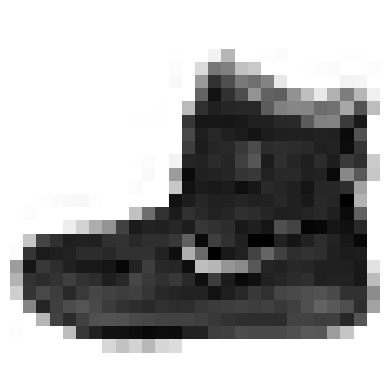

In [62]:

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [63]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

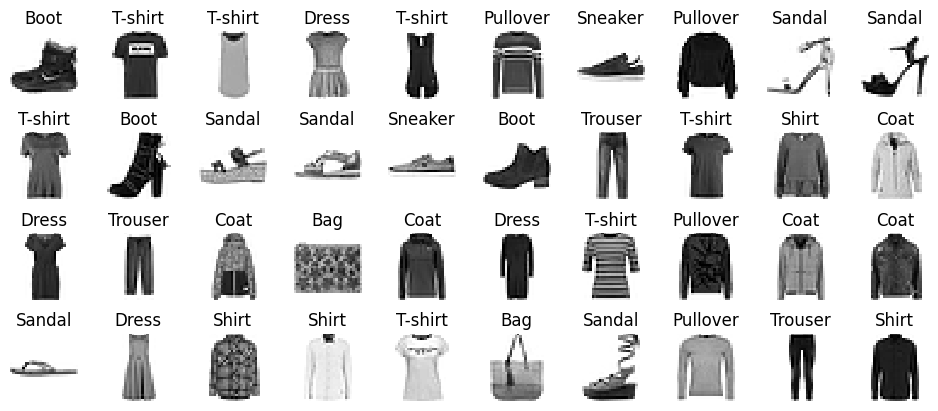

In [66]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6981 - loss: 0.9460 - val_accuracy: 0.8282 - val_loss: 0.5031
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8275 - loss: 0.5027 - val_accuracy: 0.8426 - val_loss: 0.4549
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8444 - loss: 0.4519 - val_accuracy: 0.8488 - val_loss: 0.4318
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8534 - loss: 0.4222 - val_accuracy: 0.8524 - val_loss: 0.4150
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8611 - loss: 0.4005 - val_accuracy: 0.8560 - val_loss: 0.4022
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8662 - loss: 0.3834 - val_accuracy: 0.8580 - val_loss: 0.3925
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8709 - loss: 0.3690 - val_accuracy: 0.8604 - val_loss: 0.3848
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8751 - loss: 0.3567 

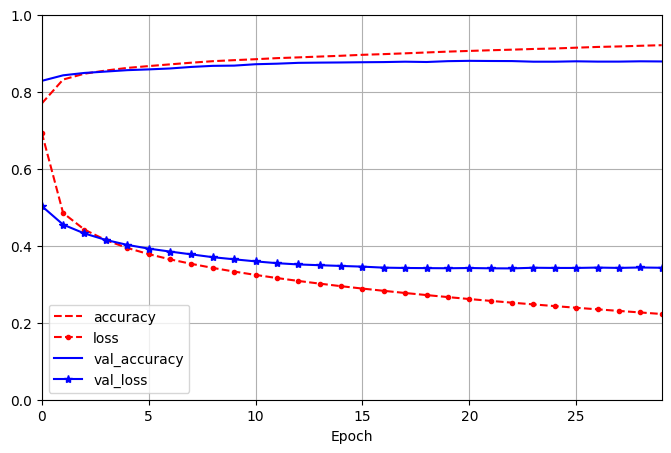

In [73]:
from tensorflow.keras.layers import Flatten

tf.random.set_seed(42)

model = tf.keras.Sequential([
  Input(shape=[28, 28]),
  Flatten(),
  Dense(300, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

## Regression


In [75]:
from sklearn.datasets import fetch_california_housing

# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.2026 - loss: 1.5565 - val_RootMeanSquaredError: 0.6191 - val_loss: 0.3833
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6297 - loss: 0.3969 - val_RootMeanSquaredError: 0.7338 - val_loss: 0.5385
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6008 - loss: 0.3613 - val_RootMeanSquaredError: 0.6240 - val_loss: 0.3893
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5850 - loss: 0.3425 - val_RootMeanSquaredError: 0.5928 - val_loss: 0.3515
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5735 - loss: 0.3291 - val_RootMeanSquaredError: 0.6014 - val_loss: 0.3617
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5658 - loss: 0.3203 - val_RootMeanSquaredError: 0.8830 - val_loss: 0.7796
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5585 - loss: 0.3120 -

# Notas

No se puede emplear cross_val_score conKeras ( creo, verificar). Hay que hacer la validación emplee esa mano.